# Aerial image dataset

This notebook aims at presenting the [Aerial Image dataset](https://project.inria.fr/aerialimagelabeling/), one of the dataset used in the current project.

The dataset images are freely available at [https://project.inria.fr/aerialimagelabeling/files/](https://project.inria.fr/aerialimagelabeling/files/).

## Introduction

Some modules are imported to do the job, as usual:

In [1]:
import numpy as np
import os
import pandas as pd
import json
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
env DEEPOSL_CONFIG=../config.ini

env: DEEPOSL_CONFIG=../config.ini


In [3]:
from deeposlandia import utils
from deeposlandia.datasets import aerial

In [4]:
DATAPATH = "../tests/data"
DATASET = "aerial"

## Metadata presentation

### Raw dataset

There are 180 training images and 180 testing images, each of which are composed of `5000*5000` pixels. The 360 images are tiles of 10 bigger images taken in 10 different areas.

For training:
- Austin
- Chicago
- Kitsap County, WA
- Tyrol (West)
- Vienna

For testing:
- Bellingham
- Bloomington
- Innsbruck
- San Francisco
- Tyrol (East)

In order to validate our results, we decided to put three images amongst each training area in a validation repository.

As a remark, original dataset folders are reorganized to fit our file template.

In [5]:
print("Number of training images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "input", "training", "images")))))
print("Number of validation images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "input", "validation", "images")))))
print("Number of testing images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "input", "testing", "images")))))

Number of training images: 1
Number of validation images: 0
Number of testing images: 2


### Image preprocessing

The raw images are far too big to process deep learning algorithms. Hence a tiling process is applied to cut them into smaller images.

If considering `240*240` tiles, we can generate smaller images from each raw image. In order to handle images all along the neural networks, we choose to use an image size that is divisible per 16.

In [6]:
print("Number of training images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", "240", "training", "images")))))
print("Number of testing images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", "240", "testing", "images")))))

Number of training images: 24
Number of testing images: 25


## Some examples

In [7]:
def show_example_image(image_filename):
    im = Image.open(os.path.join(DATAPATH, DATASET, "preprocessed", "240", "training", "images", image_filename))
    lab = Image.open(os.path.join(DATAPATH, DATASET, "preprocessed", "240", "training", "labels", image_filename))
    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(im)
    ax[1].imshow(lab)

In [8]:
os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", "240", "training", "images"))

['aerial_sample_240_240_717_679_ne.png',
 'aerial_sample_240_240_609_413_sw.png',
 'aerial_sample_240_240_22_326_se.png',
 'aerial_sample_240_240_609_413_nw.png',
 'aerial_sample_240_240_609_413_se.png',
 'aerial_sample_240_240_22_326_nw.png',
 'aerial_sample_240_240_717_679_nw.png',
 'aerial_sample_240_240_352_481_nw.png',
 'aerial_sample_240_240_717_679_sw.png',
 'aerial_sample_240_240_101_452_ne.png',
 'aerial_sample_240_240_101_452_sw.png',
 'aerial_sample_240_240_717_679_se.png',
 'aerial_sample_240_240_352_481_se.png',
 'aerial_sample_240_240_676_551_ne.png',
 'aerial_sample_240_240_676_551_sw.png',
 'aerial_sample_240_240_352_481_ne.png',
 'aerial_sample_240_240_22_326_sw.png',
 'aerial_sample_240_240_101_452_se.png',
 'aerial_sample_240_240_101_452_nw.png',
 'aerial_sample_240_240_609_413_ne.png',
 'aerial_sample_240_240_352_481_sw.png',
 'aerial_sample_240_240_22_326_ne.png',
 'aerial_sample_240_240_676_551_se.png',
 'aerial_sample_240_240_676_551_nw.png']

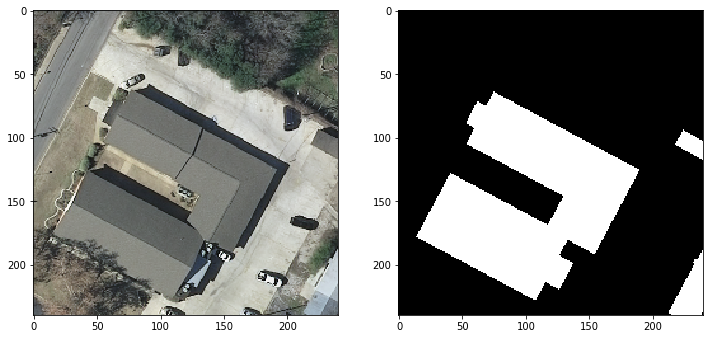

In [9]:
show_example_image("aerial_sample_240_240_101_452_ne.png")

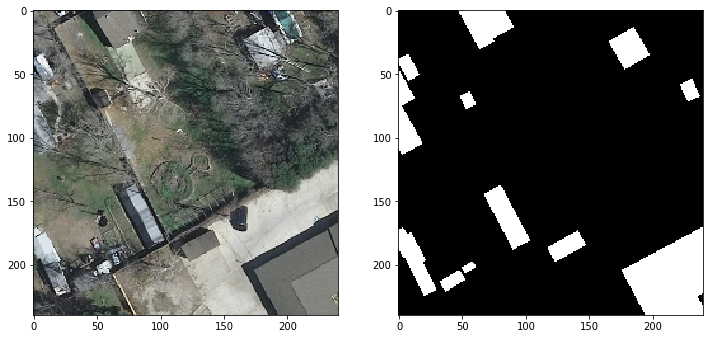

In [10]:
show_example_image("aerial_sample_240_240_22_326_nw.png")

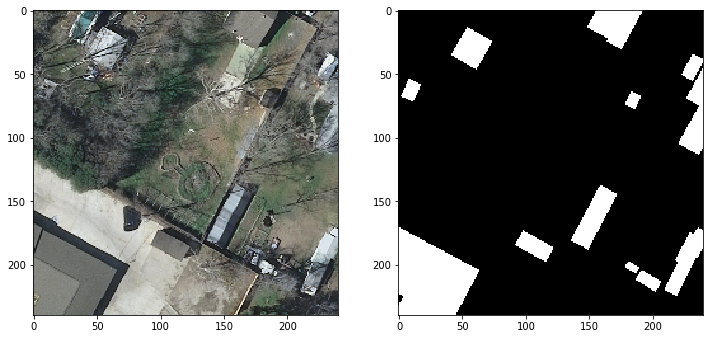

In [11]:
show_example_image("aerial_sample_240_240_22_326_ne.png")

## Dataset handling

Before to handle dataset, some folders are configured with accurate `utils` methods. We needs the folder where raw data are stored, as well as a bunch of folders for preprocessed data.

In [12]:
input_folder = utils.prepare_input_folder(DATAPATH, DATASET)
preprocess_folder = utils.prepare_preprocessed_folder(DATAPATH, DATASET, 240)

Here one can create easily a AerialImage dataset, in two steps. First, the dataset itself is created, without any image. However the labels are defined: one has `building` and `background` pixels.

In [13]:
d = aerial.AerialDataset(240)
d.get_nb_labels(), d.get_nb_images()

(2, 0)

After creating the `Dataset` structure, one can add some preprocessed images, starting from the raw dataset.

In [14]:
d.populate(output_dir=preprocess_folder["training"],
           input_dir=os.path.join(input_folder, "training"),
           nb_images=10)
d.get_nb_images()

2019-05-27 17:57:02,618 :: INFO :: __init__ :: populate : Getting 1 images to preprocess...
2019-05-27 17:57:02,635 :: INFO :: aerial :: _preprocess_for_training : Image filename: aerial_sample.tif, size: (1000, 1000)
2019-05-27 17:57:02,902 :: INFO :: aerial :: _preprocess_for_training : Generate 12 images after 3 attempts.
2019-05-27 17:57:02,905 :: INFO :: __init__ :: populate : Saved 12 images in the preprocessed dataset.


12

As we can see, the output image quantity does not correspond to the provided input number. The explanation is far simple; it is related to the dataset preprocessing, where each raw image is tiled in smaller images.

As a remark, one can also populate the dataset with existing preprocessed images, starting from a preprocessed configuration file. This will erase existing dataset information, and replace it with those in the provided file.

In [15]:
d.load(preprocess_folder["training_config"], nb_images=10)
d.get_nb_images()

2019-05-27 17:57:04,277 :: INFO :: __init__ :: load : The dataset has been loaded from ../tests/data/aerial/preprocessed/240/training.json


10